In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np

Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


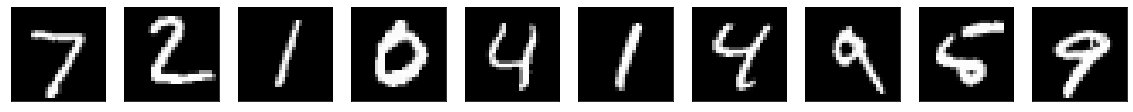

In [3]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


In [6]:
# The encoding process
input_img = Input(shape=(28, 28, 1))  

# layer 1
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# layer 2 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# layer 3 
x = Conv2D(filters = 8,  kernel_size =(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

In [7]:

# decode layer 1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# decode layer 2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# decode layer 3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

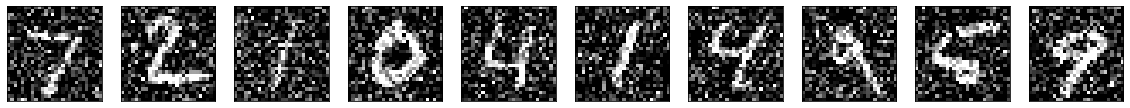

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2355 - val_loss: 0.1882
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1738 - val_loss: 0.1589
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1582 - val_loss: 0.1566
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1499 - val_loss: 0.1438
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1444 - val_loss: 0.1389
Epoch 6/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1405 - val_loss: 0.1372
Epoch 7/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1376 - val_loss: 0.1377
Epoch 8/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1354 - val_loss: 0.1300
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1335 - val_loss: 0.1345
Epoc

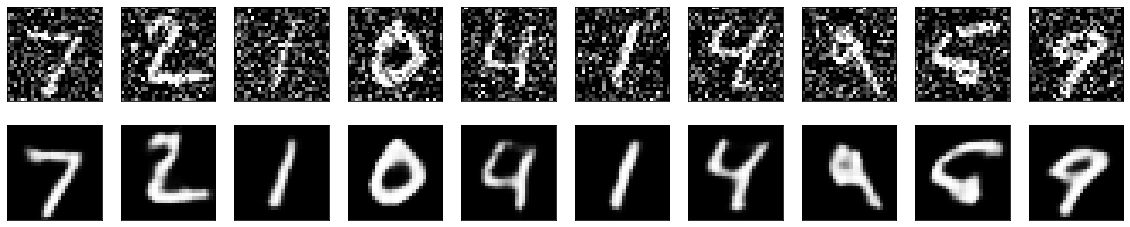

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

In [13]:
# define cnn model #add batch normalization
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


def evaluate_model(dataX, dataY, n_folds=2):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, trainacc = model.evaluate(trainX, trainY, verbose=0)
		_, testacc = model.evaluate(testX, testY, verbose=0)
		print('>Train Accuracy %.3f' % (trainacc * 100.0))
		print('>Test Accuracy %.3f' % (testacc * 100.0))        
		scores.append(testacc)

	return scores

In [11]:
from keras.layers import BatchNormalization

In [ ]:
#with encoders 

In [14]:
#load model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

decoded_x_train = autoencoder.predict(x_train_noisy)
decoded_x_test = autoencoder.predict(x_test_noisy)

trainX = decoded_x_train.reshape((decoded_x_train.shape[0], 28, 28, 1))
testX = decoded_x_test.reshape((decoded_x_test.shape[0], 28, 28, 1))

trainY = to_categorical(y_train)
testY = to_categorical(y_test)
#train_norm = trainX.astype('float32')
#test_norm = testX.astype('float32')

#train_norm = train_norm / 255.0
#test_norm = test_norm / 255.0

scores= evaluate_model(trainX, trainY) 



>Train Accuracy 97.653
>Test Accuracy 93.777
>Train Accuracy 97.900
>Test Accuracy 94.103
